# Imports
Numpy and matplotlib has to be downloaded to python envirnment if it doesn't already have it

In [133]:
import random
import numpy as np
import copy
import matplotlib.pyplot as plt

# Config

In [134]:
# Define the class for VRP configuration
class VRPConfig:
    def __init__(self):
        # Given Data
        self.cust_no = list(range(101))
        self.xcoord = [40, 45, 45, 42, 42, 42, 40, 40, 38, 38, 35, 35, 25, 22, 22, 20, 20, 18, 15, 15, 30, 30, 28, 28, 25, 25, 25, 23, 23, 20, 20, 10, 10, 8, 8, 5, 5, 2, 0, 0, 35, 35, 33, 33, 32, 30, 30, 30, 28, 28, 26, 25, 25, 44, 42, 42, 40, 40, 38, 38, 35, 50, 50, 50, 48, 48, 47, 47, 45, 45, 95, 95, 53, 92, 53, 45, 90, 88, 88, 87, 85, 85, 75, 72, 70, 68, 66, 65, 65, 63, 60, 60, 67, 65, 65, 62, 60, 60, 58, 55, 55]
        self.ycoord = [50, 68, 70, 66, 68, 65, 69, 66, 68, 70, 66, 69, 85, 75, 85, 80, 85, 75, 75, 80, 50, 52, 52, 55, 50, 52, 55, 52, 55, 50, 55, 35, 40, 40, 45, 35, 45, 40, 40, 45, 30, 32, 32, 35, 30, 30, 32, 35, 30, 35, 32, 30, 35, 5, 10, 15, 5, 15, 5, 15, 5, 30, 35, 40, 30, 40, 35, 40, 30, 35, 30, 35, 30, 30, 35, 65, 35, 30, 35, 30, 25, 35, 55, 55, 58, 60, 55, 55, 60, 58, 55, 60, 85, 85, 82, 80, 80, 85, 75, 80, 85]
        self.demand = [0, 10, 30, 10, 10, 10, 20, 20, 20, 10, 10, 10, 20, 30, 10, 40, 40, 20, 20, 10, 10, 20, 20, 10, 10, 40, 10, 10, 20, 10, 10, 20, 30, 40, 20, 10, 10, 20, 30, 20, 10, 10, 20, 10, 10, 10, 30, 10, 10, 10, 10, 10, 10, 20, 40, 10, 30, 40, 30, 10, 20, 10, 20, 50, 10, 10, 10, 10, 10, 10, 30, 20, 10, 10, 50, 20, 10, 10, 20, 10, 10, 30, 20, 10, 20, 30, 10, 20, 30, 10, 10, 10, 20, 40, 10, 30, 10, 30, 20, 10, 20]
        self.ready_time = [0, 912, 825, 65, 727, 15, 621, 170, 255, 534, 357, 448, 652, 30, 567, 384, 475, 99, 179, 278, 10, 914, 812, 732, 65, 169, 622, 261, 546, 358, 449, 200, 31, 87, 751, 283, 665, 383, 479, 567, 264, 166, 68, 16, 359, 541, 448, 1054, 632, 1001, 815, 725, 912, 286, 186, 95, 385, 35, 471, 651, 562, 531, 262, 171, 632, 76, 826, 12, 734, 916, 387, 293, 450, 478, 353, 997, 203, 574, 109, 668, 769, 47, 369, 265, 458, 555, 173, 85, 645, 737, 20, 836, 368, 475, 285, 196, 95, 561, 30, 743, 647]
        self.due_date = [1236, 967, 870, 146, 782, 67, 702, 225, 324, 605, 410, 505, 721, 92, 620, 429, 528, 148, 254, 345, 73, 965, 883, 777, 144, 224, 701, 316, 593, 405, 504, 237, 100, 158, 816, 344, 716, 434, 522, 624, 321, 235, 149, 80, 412, 600, 509, 1127, 693, 1066, 880, 786, 969, 347, 257, 158, 436, 87, 534, 740, 629, 610, 317, 218, 693, 129, 875, 77, 777, 969, 456, 360, 505, 551, 412, 1068, 260, 643, 170, 731, 820, 124, 420, 338, 523, 612, 238, 144, 708, 802, 84, 889, 441, 518, 336, 239, 156, 622, 84, 820, 726]
        self.service_time = [0] + [90] * 100  # All customers including depot have service time of 90 minutes

        self.max_vehicles = 25
        self.max_capacity = 200
        
        # PSO Parameters
        self.w = 0.4  # Inertia weight
        self.c1 = 1  # Cognitive coefficient (particle's own best)
        self.c2 = 1  # Social coefficient (global best)
        self.num_iterations = 100  # Number of iterations

        # Performance tuning variables
        self.penalty_time_window = 1000  # Example penalty for missing time window
        self.penalty_capacity = 100  # Penalty for exceeding vehicle capacity
        self.penalty_route_length = 0.1  # Penalty for longer route lengths
        self.penalty_num_vehicles = 50  # Penalty for using more vehicles than necessary
        self.penalty_service_time = 0.5  # Penalty for excess service time
        self.min_route_duration = 100  # Minimum route duration penalty

        # Add the missing customers and duplicate visits penalty
        self.penalty_missing_customers = 1000  # High penalty for missing customers
        self.penalty_duplicate_visits = 500  # High penalty for duplicate visits

    def calculate_distance(self, i, j):
        """Euclidean distance between two customers"""
        return np.sqrt((self.xcoord[i] - self.xcoord[j]) ** 2 + (self.ycoord[i] - self.ycoord[j]) ** 2)

    def calculate_total_route_length(self, routes):
        """Calculate the total length of the route"""
        total_length = 0
        for route in routes:
            for i in range(len(route) - 1):
                total_length += self.calculate_distance(route[i], route[i + 1])
        return total_length

    def calculate_penalty(self, routes, capacities):
        """Calculate penalties for time window violations, capacity violations, etc."""
        penalty = 0
        visited_customers = set()
        total_capacity = 0
        total_time = 0
        total_service_time = 0

        # Check for missing customers
        for route in routes:
            visited_customers.update(route)

        missing_customers = set(self.cust_no) - visited_customers
        penalty += len(missing_customers) * self.penalty_missing_customers

        # Check for duplicate visits
        duplicate_visits = len(visited_customers) - len(set(visited_customers))
        penalty += duplicate_visits * self.penalty_duplicate_visits

        # Calculate penalties for other violations (capacity, time window, route length)
        for route in routes:
            if len(route) == 0:
                continue

            route_capacity = sum(self.demand[customer] for customer in route)
            if route_capacity > self.max_capacity:
                penalty += self.penalty_capacity * (route_capacity - self.max_capacity)

            # Time and service time penalties
            route_time = 0
            for i in range(len(route) - 1):
                customer = route[i]
                next_customer = route[i + 1]
                distance = self.calculate_distance(customer, next_customer)
                service_time = self.service_time[customer]

                route_time += distance / 60 + service_time  # Assuming travel time in hours and service time in minutes

                # Time window penalties
                ready_time = self.ready_time[customer]
                due_date = self.due_date[customer]
                if route_time < ready_time:
                    route_time = ready_time
                if route_time > due_date:
                    penalty += self.penalty_time_window  # Time window violation penalty

        return penalty

# Particle

In [135]:
class Particle:
    def __init__(self, config):
        self.config = config  # Store the config object
        self.num_customers = len(config.cust_no)  # Number of customers
        self.position = [random.randint(0, self.num_customers-1) for _ in range(self.num_customers)]
        self.velocity = [random.random() for _ in range(self.num_customers)]
        self.best_position = self.position.copy()

        # Initialize fitness values
        self.best_fitness = float('inf')  # Start with an infinitely bad fitness
        self.value = float('inf')  # Current fitness value, will be updated in the optimization

        # Other attributes depending on the configuration
        self.max_capacity = config.max_capacity
        self.max_vehicles = config.max_vehicles
        self.service_time = config.service_time
        self.demand = config.demand
        self.ready_time = config.ready_time
        self.due_date = config.due_date
        self.xcoord = config.xcoord
        self.ycoord = config.ycoord

        # Initialize routes
        self.routes = self.initialize_routes()  # Initialize routes here
    
    def initialize_routes(self):
        """Randomly initialize routes respecting vehicle capacity and customer demand,
        with the first customer of each route being the one furthest away from already
        assigned customers of other vehicles."""
        
        routes = [[] for _ in range(self.max_vehicles)]  # Create empty routes for each vehicle
        route_demands = [0] * self.max_vehicles  # Initialize the route demands for each vehicle
        unassigned_customers = list(range(1, self.num_customers))  # Customer indices (excluding depot)
        
        # List to store already assigned customers
        assigned_customers = [0]  # Start with depot assigned (depot is customer 0)

        # Efficient way to track the "boundary" for each vehicle's first customer
        vehicle_boundaries = [float('-inf')] * self.max_vehicles  # Initially no customers assigned, so no boundaries

        # Step 1: Pick the first customer for each vehicle
        for vehicle_id in range(self.max_vehicles):
            max_dist = -float('inf')
            selected_customer = None
            
            # Loop over all unassigned customers and find the furthest one from all assigned customers
            for customer in unassigned_customers:
                min_distance = float('inf')  # Start with a very large minimum distance
                for assigned_customer in assigned_customers:
                    distance = self.config.calculate_distance(assigned_customer, customer)
                    min_distance = min(min_distance, distance)

                # Choose the customer with the largest minimum distance
                if min_distance > max_dist:
                    max_dist = min_distance
                    selected_customer = customer
            
            # Assign the selected customer to the current vehicle's route
            routes[vehicle_id].append(selected_customer)
            assigned_customers.append(selected_customer)  # Mark customer as assigned
            unassigned_customers.remove(selected_customer)  # Remove from the unassigned list

            # Update the boundary for this vehicle to reflect the furthest assigned customer
            vehicle_boundaries[vehicle_id] = max_dist

        # Step 2: Assign the remaining customers to the vehicles
        while unassigned_customers:
            for vehicle_id in range(self.max_vehicles):
                assigned = False
                while not assigned and unassigned_customers:
                    # Pick a random unassigned customer and check if it can be added
                    customer = random.choice(unassigned_customers)
                    route = routes[vehicle_id]
                    route_demand = route_demands[vehicle_id]

                    # Check if adding the customer will exceed capacity
                    if route_demand + self.demand[customer] <= self.max_capacity:
                        route.append(customer)
                        route_demands[vehicle_id] += self.demand[customer]
                        assigned_customers.append(customer)
                        unassigned_customers.remove(customer)
                        assigned = True

        # Step 3: Ensure depot is in each route (at start and end)
        for route in routes:
            if len(route) > 0:
                route.insert(0, 0)  # Ensure depot is the first element in the route
                route.append(0)     # Ensure depot is the last element in the route

        return routes

    def fitness(self, routes):
        """Calculate the fitness of a solution (lower is better)."""
        total_distance = 0
        penalty = 0

        # Calculate route distance and penalties for each route
        for route in routes:
            if len(route) == 0:
                continue  # Skip empty routes
            
            route_distance = 0
            route_capacity = 0
            for i in range(len(route) - 1):
                route_distance += self.config.calculate_distance(route[i], route[i+1])
                route_capacity += self.demand[route[i]]

            # Apply capacity penalty if over capacity
            if route_capacity > self.max_capacity:
                penalty += self.config.penalty_capacity

            # Add the distance back to depot (assuming depot is customer 0)
            route_distance += self.config.calculate_distance(route[-1], 0)

            total_distance += route_distance

        # Apply penalties for missing or duplicated customers
        penalty += self.config.calculate_penalty(routes, [self.max_capacity] * self.max_vehicles)
        
        # Total fitness includes both route distance and penalty
        return total_distance + penalty

    # Fix to ensure both positions are treated as customer index permutations
    def update_velocity(self, global_best_position):
        """Update the velocity using PSO equations with route sequences."""
        r1, r2 = random.random(), random.random()

        # Cognitive component: Update velocity based on the difference between the current position
        # and the personal best position for each customer in the route.
        cognitive = []
        for i in range(self.num_customers):
            # Find customer i's index in the current route position and the best position
            try:
                cognitive_val = self.config.c1 * r1 * (self.best_position.index(self.position[i]) - i)
            except ValueError:
                cognitive_val = 0  # In case the customer isn't found in best_position
            cognitive.append(cognitive_val)

        # Social component: Update velocity based on the difference between the current position
        # and the global best position for each customer in the route.
        social = []
        for i in range(self.num_customers):
            found = False
            for route in global_best_position:
                if i in route:
                    try:
                        social_val = self.config.c2 * r2 * (route.index(i) - self.position.index(i))
                    except ValueError:
                        social_val = 0  # In case the customer isn't found in the current position
                    social.append(social_val)
                    found = True
                    break
            if not found:
                social.append(0)  # If the customer isn't found in the global_best_position

        # Update velocity with the inertia term, cognitive term, and social term.
        self.velocity = [
            self.config.w * self.velocity[i] + cognitive[i] + social[i]
            for i in range(self.num_customers)
        ]

    def update_position(self):
        """Update the particle position using the new velocity (route update using swaps)."""
        # Sort the velocity values to prioritize larger values for swaps
        sorted_velocity_indices = sorted(range(len(self.velocity)), key=lambda i: self.velocity[i])

        # Swap customers in the position according to the sorted velocity
        for i in range(len(sorted_velocity_indices) // 2):  # Apply swaps for the top half of velocity
            idx1 = sorted_velocity_indices[i]
            idx2 = sorted_velocity_indices[-(i + 1)]
            # Swap positions in the route
            self.position[idx1], self.position[idx2] = self.position[idx2], self.position[idx1]

        # Ensure that the position is within valid customer indices
        self.position = [max(0, min(self.num_customers - 1, p)) for p in self.position]

        # Recalculate the routes based on the updated position
        self.routes = self.repair_routes(self.position)  # Ensure valid routes

    def repair_routes(self, position):
        """Ensure routes are feasible after position update (e.g., by ensuring no capacity violations)."""
        routes = [[] for _ in range(self.max_vehicles)]  # Empty routes for each vehicle
        unassigned_customers = list(range(1, self.num_customers))  # Customer indices (excluding depot)

        # Reassign customers to vehicles (respecting capacity and other constraints)
        for customer in unassigned_customers:
            assigned = False
            while not assigned:
                # Randomly select a vehicle and add the customer to the route
                vehicle_id = random.randint(0, self.max_vehicles - 1)
                route = routes[vehicle_id]
                route_demand = sum(self.demand[cust] for cust in route)

                # Check if adding the customer will exceed capacity
                if route_demand + self.demand[customer] <= self.max_capacity:
                    route.append(customer)
                    assigned = True

        # Ensure depot is in each route
        for route in routes:
            if len(route) > 0:
                route.insert(0, 0)  # Ensure depot is the first element in the route
                route.append(0)     # Ensure depot is the last element in the route

        return routes

    def apply_2opt(self, routes):
        """Apply the 2-opt local search to improve the current solution."""
        for route_idx in range(self.num_vehicles):
            route = routes[route_idx]
            if len(route) < 3:  # No need to apply 2-opt on a route with fewer than 3 customers
                continue
            improved = True
            while improved:
                improved = False
                # Try every pair of customers in the route
                for i in range(1, len(route) - 1):
                    for j in range(i + 1, len(route)):
                        # Skip adjacent customers
                        if j == i + 1:
                            continue
                        # Perform the 2-opt swap
                        new_route = route[:i] + route[j:i-1:-1] + route[j+1:]
                        if self.fitness([new_route]) < self.fitness([route]):
                            route = new_route
                            improved = True
                            break
            routes[route_idx] = route
        return routes

# PSO

In [136]:
class PSO_VRP:
    def __init__(self, config):
        self.config = config
        self.particles = [Particle(config) for _ in range(config.max_vehicles)]
        self.global_best_position = copy.deepcopy(self.particles[0].routes)
        self.global_best_fitness = self.particles[0].best_fitness
        self.best_solution = None  # To store the best solution found
        self.best_solution_fitness = float('inf')  # Initialize with an infinitely bad fitness

    def optimize(self):
        """Run PSO optimization for a fixed number of iterations."""
        for iteration in range(self.config.num_iterations):
            for particle in self.particles:
                # Update velocity
                particle.update_velocity(self.global_best_position)
                
                # Update position
                particle.update_position()

                # Evaluate the fitness of the new position
                current_fitness = particle.fitness(particle.routes)

                # Update the personal best of the particle
                if current_fitness < particle.best_fitness:
                    particle.best_fitness = current_fitness
                    particle.best_position = copy.deepcopy(particle.routes)  # Use deepcopy here

                # Update the global best position if necessary
                if current_fitness < self.global_best_fitness:
                    self.global_best_fitness = current_fitness
                    self.global_best_position = copy.deepcopy(particle.routes)  # Use deepcopy here

            # Output progress
            print(f"Iteration {iteration+1}/{self.config.num_iterations} - Best Fitness: {self.global_best_fitness}")
        
        # After optimization, call the print function to display the results
        self.print_best_solution()

    def print_best_solution(self):
        """Print the details of the best solution and its performance metrics."""
        print("\nOptimization Complete!")
        print(f"Best Fitness: {self.global_best_fitness}")
        
        # Calculate additional performance metrics like time and capacity violations
        time_violations, capacity_violations = self.calculate_performance_metrics(self.global_best_position)

        print(f"Time Violations: {time_violations}")
        print(f"Capacity Violations: {capacity_violations}")

        # Track visited customers
        visited_customers = set()
        for route in self.global_best_position:
            visited_customers.update(route)

        # Track all customers (assuming cust_no contains all customer IDs including the depot as 0)
        all_customers = set(self.config.cust_no)  # Assuming cust_no is a list of customer IDs (including depot as 0)

        # Exclude depot from all customers when checking missed customers
        all_customers.discard(0)  # Remove depot from missed customer checking

        # Find missed customers (those not visited)
        missed_customers = all_customers - visited_customers

        # Print best solution routes
        print("\nBest Solution Routes:")
        
        depot_check_violations = 0
        violated_vehicles = set()  # To track unique vehicles that violate the depot rule
        used_vehicles = 0  # To count how many vehicles were actually used
        
        for vehicle_idx, route in enumerate(self.global_best_position):
            if route:  # If the route is not empty, the vehicle is used
                used_vehicles += 1
            print(f"Vehicle {vehicle_idx + 1}: {route}")

            # Only check depot start/end if the route is not empty
            if route:  # Check if the route is not empty
                violated_start = route[0] != 0  # Violation if route doesn't start at depot
                violated_end = route[-1] != 0  # Violation if route doesn't end at depot
                
                if violated_start or violated_end:
                    violated_vehicles.add(vehicle_idx)  # Add vehicle index to set for violations
                    
                    # Print specific warnings
                    if violated_start:
                        print(f"Warning: Vehicle {vehicle_idx + 1} does not start at the depot.")
                    if violated_end:
                        print(f"Warning: Vehicle {vehicle_idx + 1} does not end at the depot.")
        
        # Print the total number of vehicles that violated the depot start/end rule
        depot_check_violations = len(violated_vehicles)
        
        # Print the depot violation summary
        if depot_check_violations > 0:
            print(f"\nWarning: {depot_check_violations} vehicles did not follow the depot start/end rule.")
        else:
            print("\nAll vehicles started and ended at the depot.")

        # Print the number of used vehicles
        print(f"\nNumber of vehicles used: {used_vehicles}")

        # Print the customers that were missed (if any)
        if missed_customers:
            print(f"\nMissed Customers: {sorted(missed_customers)}")
        else:
            print("\nAll customers were visited!")
        
        # Visualize the routes after the optimization
        self.visualize_routes()

    def calculate_performance_metrics(self, routes):
        """Calculate performance metrics like time and capacity violations."""
        time_violations = 0
        capacity_violations = 0

        for route in routes:
            if len(route) == 0:
                continue  # Skip empty routes

            # Calculate the route capacity and time violations
            route_capacity = 0
            route_time = 0

            # For each customer in the route, calculate capacity and time window violations
            for i in range(len(route)):
                customer = route[i]
                route_capacity += self.config.demand[customer]

                # Check if we exceed the capacity
                if route_capacity > self.config.max_capacity:
                    capacity_violations += 1

                # Calculate arrival time (for simplicity, assuming service time is fixed)
                service_time = self.config.service_time[customer]
                if i > 0:
                    previous_customer = route[i - 1]
                    travel_time = self.config.calculate_distance(previous_customer, customer) / 60  # assuming distance in km and speed in km/h
                    route_time += travel_time + service_time  # Add travel time and service time
                
                # Check time window violations (simplified)
                ready_time = self.config.ready_time[customer]
                due_date = self.config.due_date[customer]
                if route_time < ready_time:
                    route_time = ready_time  # Wait until ready time
                if route_time > due_date:
                    time_violations += 1

        return time_violations, capacity_violations

    def visualize_routes(self, focus_vehicle_idx=None):
        """Visualize the routes with Matplotlib and focus on a specific vehicle if requested."""
        plt.figure(figsize=(12, 8))

        # Calculate the overall min and max values for x and y coordinates (to keep consistent limits)
        all_x_coords = self.config.xcoord
        all_y_coords = self.config.ycoord

        # Compute axis limits based on all customer coordinates (including depot)
        xmin, xmax = min(all_x_coords) - 10, max(all_x_coords) + 10
        ymin, ymax = min(all_y_coords) - 10, max(all_y_coords) + 10

        # Plot each vehicle's route with a different color
        for vehicle_idx, route in enumerate(self.global_best_position):
            if len(route) == 0:
                continue  # Skip empty routes

            # Extract customer coordinates
            x_coords = [self.config.xcoord[cust] for cust in route]
            y_coords = [self.config.ycoord[cust] for cust in route]

            # Determine the color and style for the plot
            if vehicle_idx == focus_vehicle_idx:
                # Highlight the selected vehicle (e.g., thicker line, different color)
                plt.plot(x_coords, y_coords, marker='o', label=f'Vehicle {vehicle_idx + 1}', color='red', linewidth=3)
            else:
                # Light color for other vehicles
                plt.plot(x_coords, y_coords, marker='o', color=plt.cm.jet(vehicle_idx / len(self.global_best_position)), alpha=0.3)

            # Add customer labels (with slight offset to avoid overlap)
            for i, cust in enumerate(route):
                # Calculate label position with an offset to avoid overlapping the customer point
                label_x = self.config.xcoord[cust]
                label_y = self.config.ycoord[cust]
                offset_x = 2  # Horizontal offset
                offset_y = 2  # Vertical offset

                # Place the label slightly off to the right and slightly above
                plt.text(label_x + offset_x, label_y + offset_y, str(cust), fontsize=12, ha='left', va='bottom')

        # Plot depot (customer 0) with a distinct marker
        plt.scatter(self.config.xcoord[0], self.config.ycoord[0], color='black', s=100, marker='*', label='Depot')

        # Set the axis limits to be consistent for all plots
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)

        # Optionally zoom in on the focused vehicle's route (if specified), but maintain consistent map size
        if focus_vehicle_idx is not None:
            # You can optionally highlight the focused vehicle by keeping the axis limits constant
            pass  # No need to modify limits, the map size is fixed

        # Customize the plot
        plt.title('Optimized Vehicle Routes')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(True)
        plt.show()

# Initialize and Run

Iteration 1/100 - Best Fitness: 56668.80126070953
Iteration 2/100 - Best Fitness: 55646.874872766435
Iteration 3/100 - Best Fitness: 55646.874872766435
Iteration 4/100 - Best Fitness: 55646.874872766435
Iteration 5/100 - Best Fitness: 52888.89798367695
Iteration 6/100 - Best Fitness: 52888.89798367695
Iteration 7/100 - Best Fitness: 52888.89798367695
Iteration 8/100 - Best Fitness: 52888.89798367695
Iteration 9/100 - Best Fitness: 52888.89798367695
Iteration 10/100 - Best Fitness: 52888.89798367695
Iteration 11/100 - Best Fitness: 50470.59453938976
Iteration 12/100 - Best Fitness: 50470.59453938976
Iteration 13/100 - Best Fitness: 50470.59453938976
Iteration 14/100 - Best Fitness: 50470.59453938976
Iteration 15/100 - Best Fitness: 50470.59453938976
Iteration 16/100 - Best Fitness: 50470.59453938976
Iteration 17/100 - Best Fitness: 50470.59453938976
Iteration 18/100 - Best Fitness: 50470.59453938976
Iteration 19/100 - Best Fitness: 50470.59453938976
Iteration 20/100 - Best Fitness: 5047

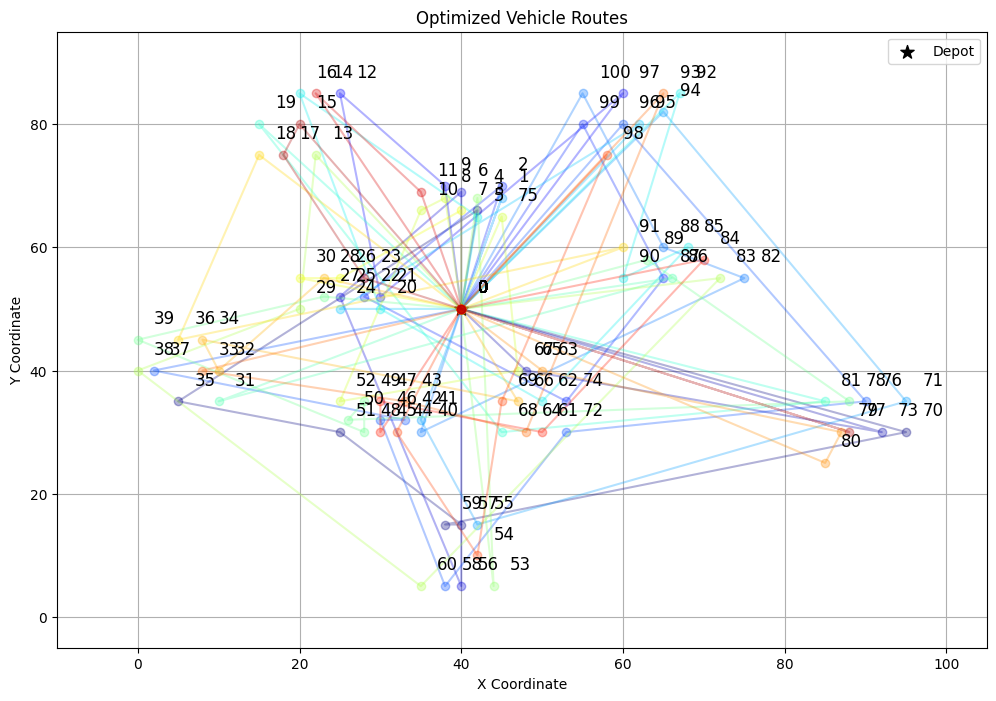

In [137]:
# Initialize the configuration and PSO solver
config = VRPConfig()  # Your VRP configuration, including coordinates, time windows, etc.
pso_solver = PSO_VRP(config)  # Create an instance of your PSO solver

# Run the optimization
pso_solver.optimize()  # This method will update the global_best_position with the best solution

# Visualizations

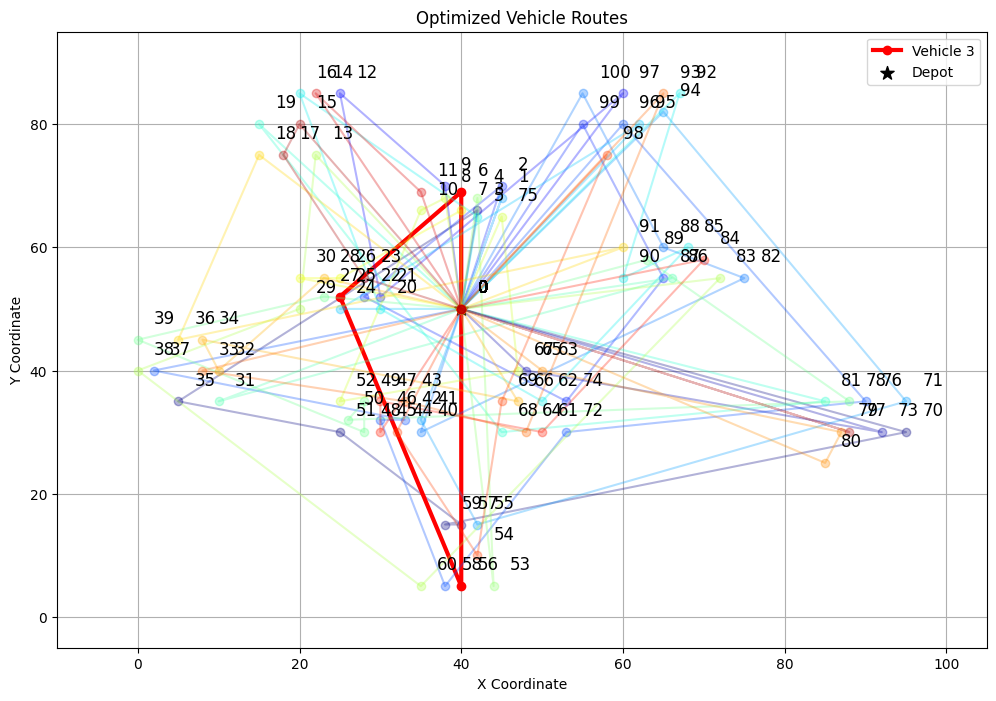

In [141]:
# Highlight a single vehicle
pso_solver.visualize_routes(focus_vehicle_idx=2)